<a href="https://colab.research.google.com/github/U-ohata/Rabbit_Report_2/blob/Rabbit_Report_Colaboratory/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

主成分分析

In [14]:
#numpyと、乳がんのデータセット読み込み
import numpy as np
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame
#canser変数にデータ読み込み
canser = load_breast_cancer()
#canserデータをデータフレームに変換
df = DataFrame(data=canser.data, columns = canser.feature_names)

In [3]:
#データフレーム表示
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
#項目名表示
print(canser['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
#描画ファイルインポート
import matplotlib.pyplot as plot

二次元データについて

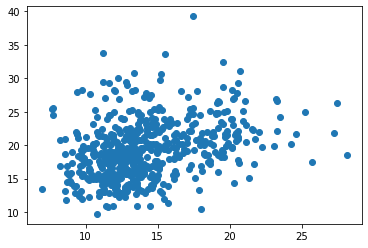

In [16]:
#mean radius列のみxに抽出
x = df.loc[:, 'mean radius'].values
#mean textureのみyに抽出
y = df.loc[:, 'mean texture'].values
#点で描画
plot.plot(x,y,'o')

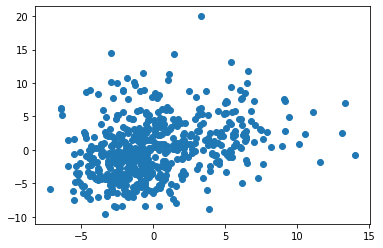

In [55]:
#mean radius列の平均を0に変換
new_x = x - sum(x)/len(x)
#mean texture列の平均を0に変換
new_y = y - sum(y)/len(y)
#点で描画
plot.plot(new_x,new_y,'o')

In [56]:
#主成分分析モデルインポート
from sklearn.decomposition import PCA

In [57]:
#model変数に主成分分析モデル代入、
model = PCA(copy=True, n_components=2, whiten=False)
model.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [50]:
list = np.stack([new_x,new_y],1)
print(list)

[[ 3.86270826 -8.90964851]
 [ 6.44270826 -1.51964851]
 [ 5.56270826  1.96035149]
 ...
 [ 2.47270826  8.79035149]
 [ 6.47270826 10.04035149]
 [-6.36729174  5.25035149]]


In [51]:
#主成分分析モデル学習
model.fit(list)
#学習後データ(変換後データ)表示
print(model.transform(list))

[[-5.90482284  7.709437  ]
 [ 1.80681941  6.3681414 ]
 [ 4.41905786  3.90622949]
 ...
 [ 8.88288899 -2.11632908]
 [11.92104828  0.77020658]
 [ 1.48927797 -8.11730534]]


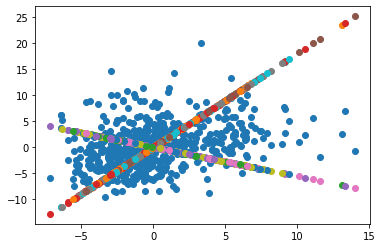

In [54]:
#データを点で描画
plot.plot(new_x,new_y,'o')
#主成分の方向を点で描画
for i in range(len(list)):
  #変換したデータを描画
  #plot.plot(model.transform(list)[i][0],model.transform(list)[i][1],'o')
  #第1主成分方向を描画
  plot.plot(new_x[i],new_x[i] * (model.components_[0][1] / model.components_[0][0]) ,'o')
  #第2主成分方向を描画
  plot.plot(new_x[i],new_x[i] * (model.components_[1][1] / model.components_[1][0]) ,'o')

多次元データについて

In [59]:
#主成分分析モデル学習
model.fit(df)
#変換後データ(32次元から2次元に)表示
print(model.transform(df))

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


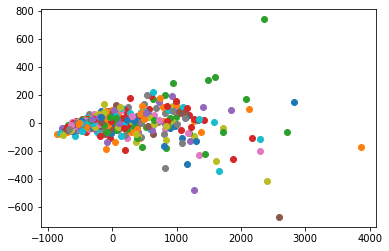

In [60]:
#点で描画
#plot.plot(x,y,'o')
#変換後データを点で描画
for i in range(len(df)):
  plot.plot(model.transform(df)[i][0],model.transform(df)[i][1],'o')

In [61]:
#各軸の寄与率描画
print(model.explained_variance_ratio_)

[0.98204467 0.01617649]
